In [1]:
import pandas as pd
from venn import venn
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os.path
import matplotlib
import os


In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [3]:
cmap = matplotlib.cm.get_cmap('Dark2')
cmap1 = matplotlib.cm.get_cmap('Paired')
cmap_beta_bin = ListedColormap(list(cmap.colors[0:3])+[cmap.colors[5]])
cmap_beta_all_rrbs = ListedColormap([cmap1.colors[0]] + list(cmap.colors[3:5]) + [cmap.colors[6]])
cmap_beta_all_wgbs = ListedColormap([cmap1.colors[0]] + list(cmap.colors[3:5])  + [cmap.colors[6]] + [cmap.colors[7]])

In [4]:
methods = ["MethylSig", "DSS (no smoothing)", "DSS (smoothing)", "methylkit", "methylkit (overdispersion)", "RADmeth", "HMM-DM", "BSmooth"]

In [32]:
datasets = ['GSE103886', 'GSE150592', 'GSE148060', 'GSE138598','GSE119980', 'GSE149608']

In [ ]:
base_dir = ""

C:\Users\Lenovo\anaconda3\lib\site-packages\venn\_venn.py:83: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _, ax = subplots(nrows=1, ncols=1, figsize=figsize)


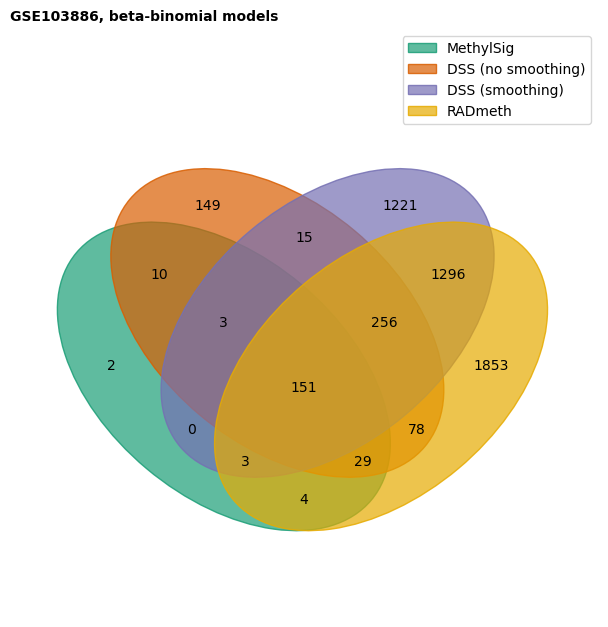

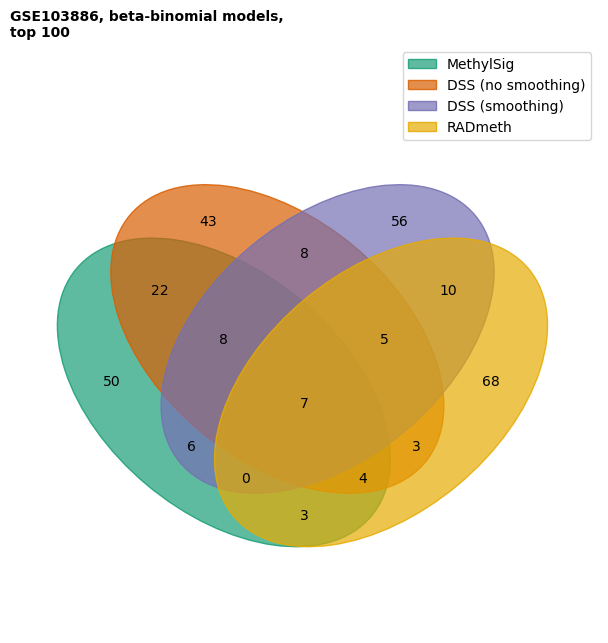

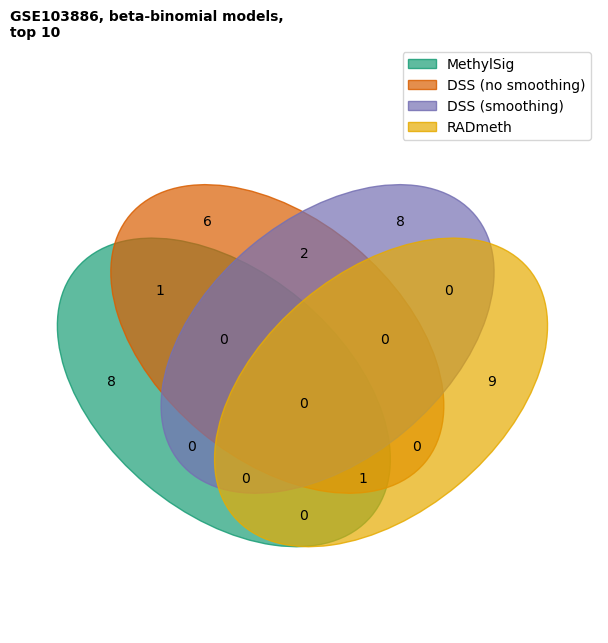

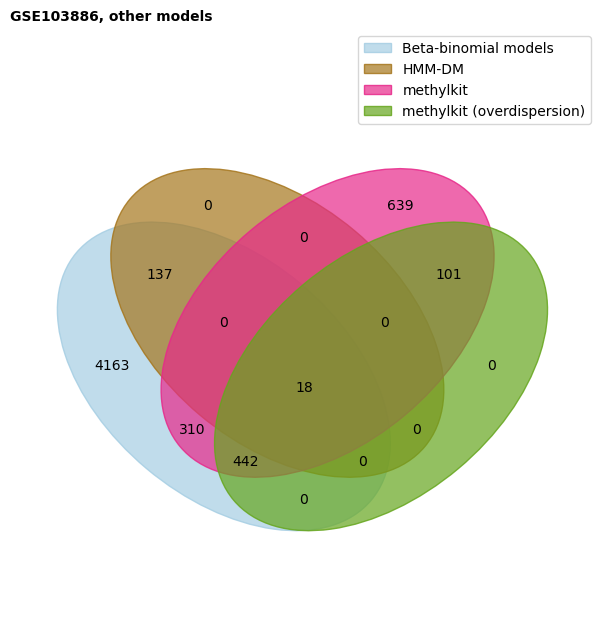

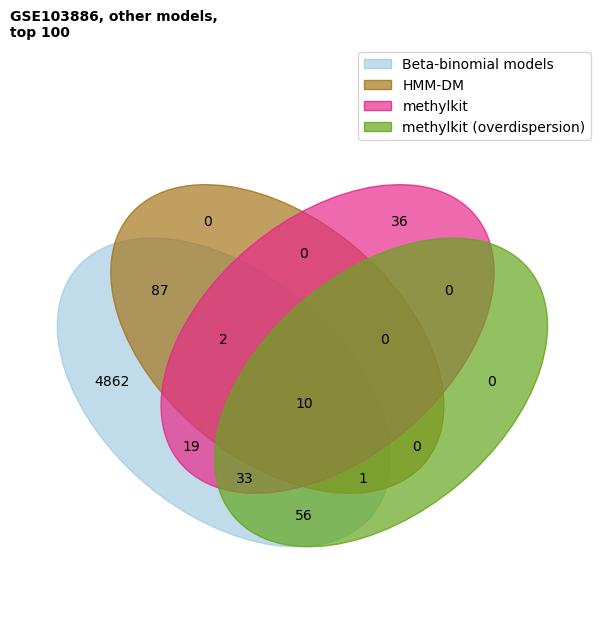

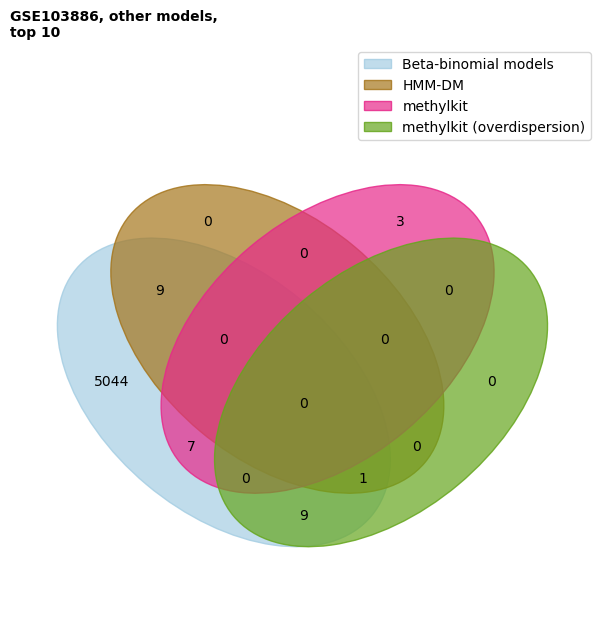

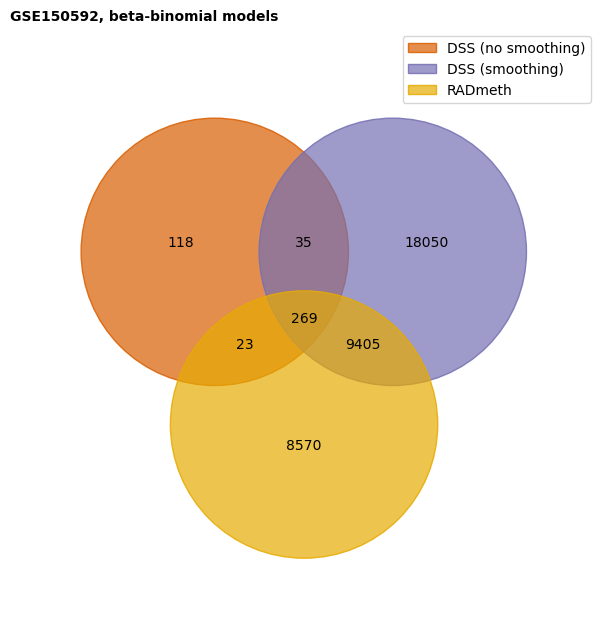

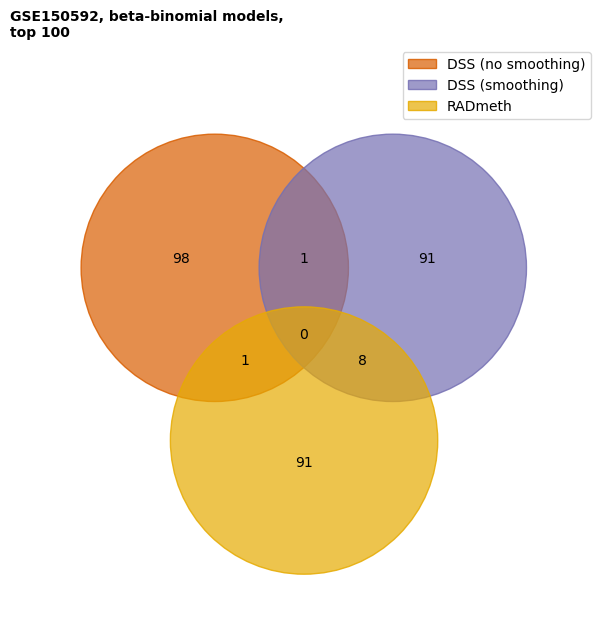

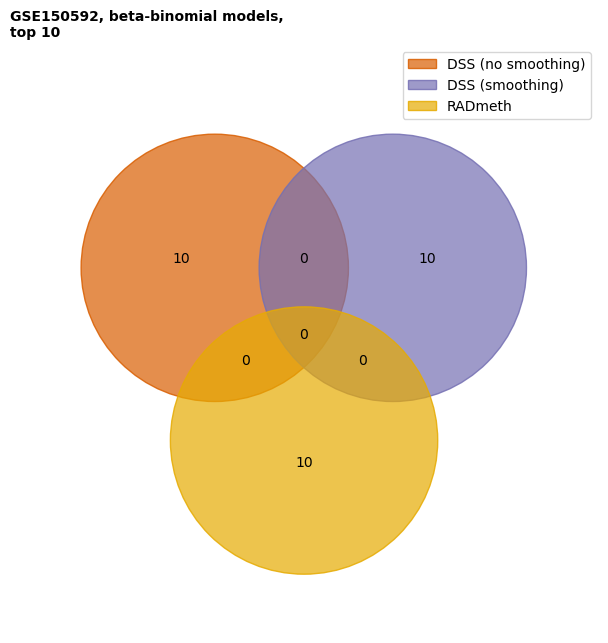

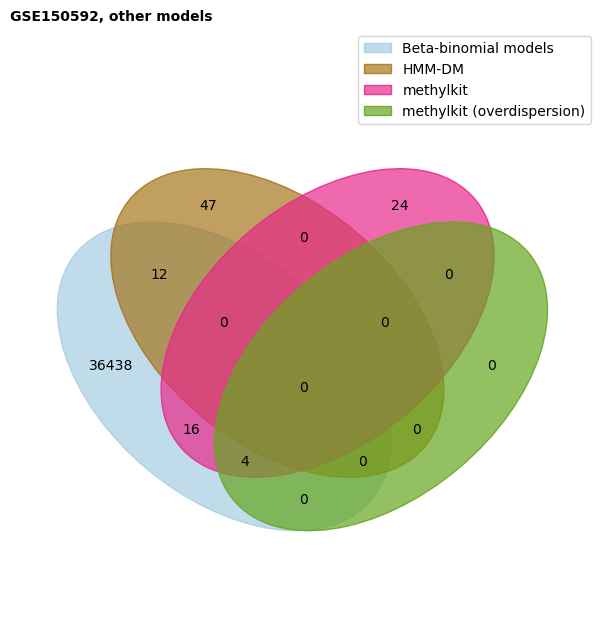

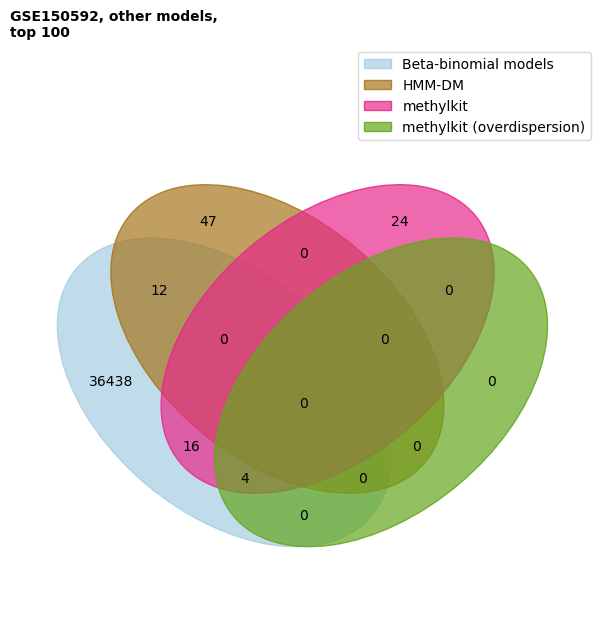

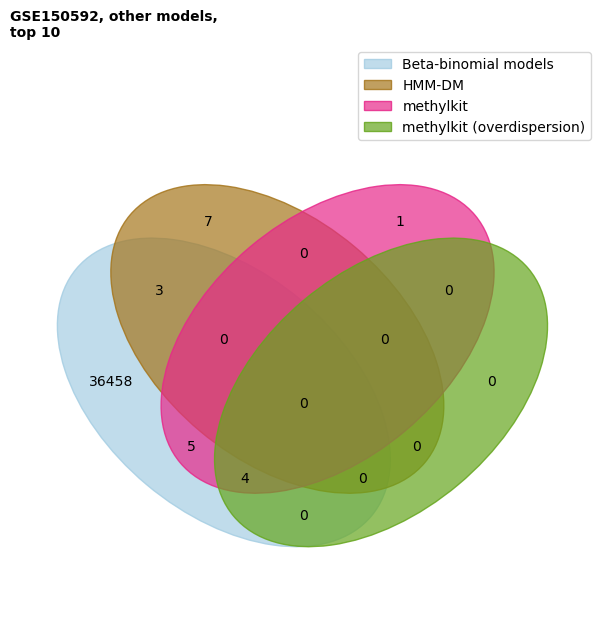

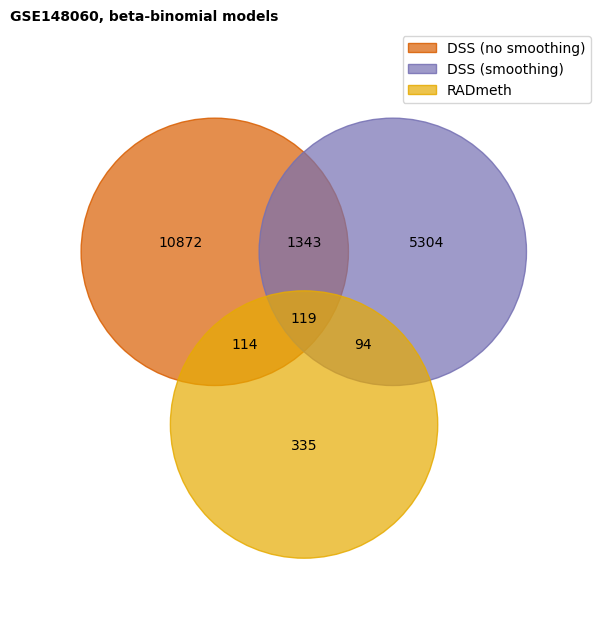

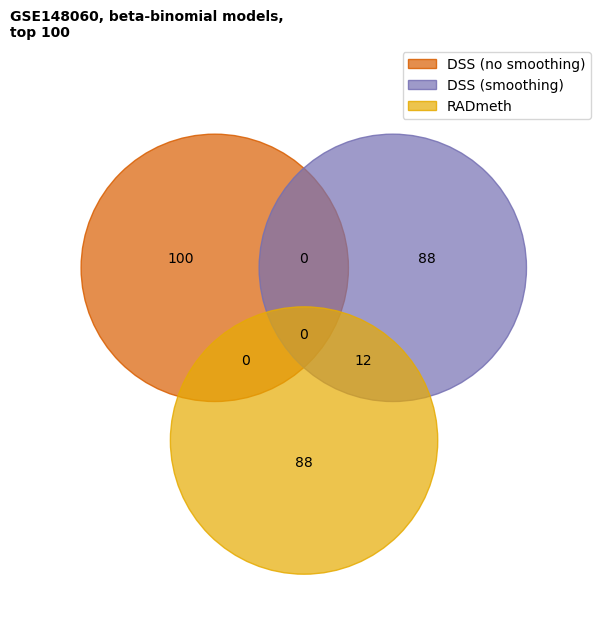

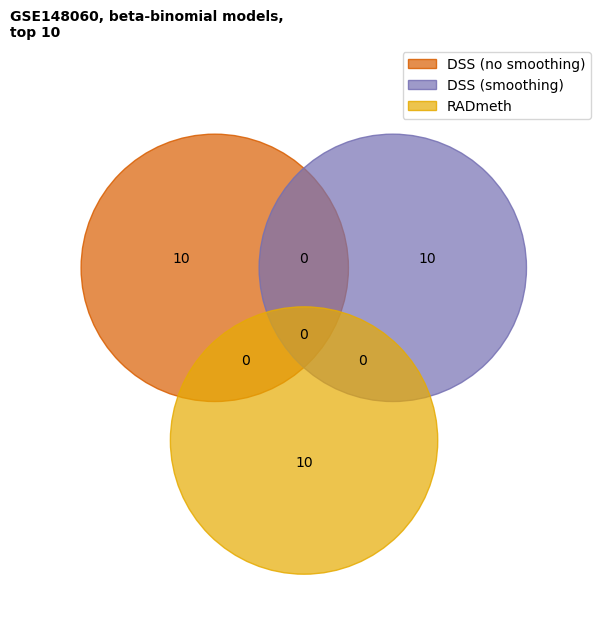

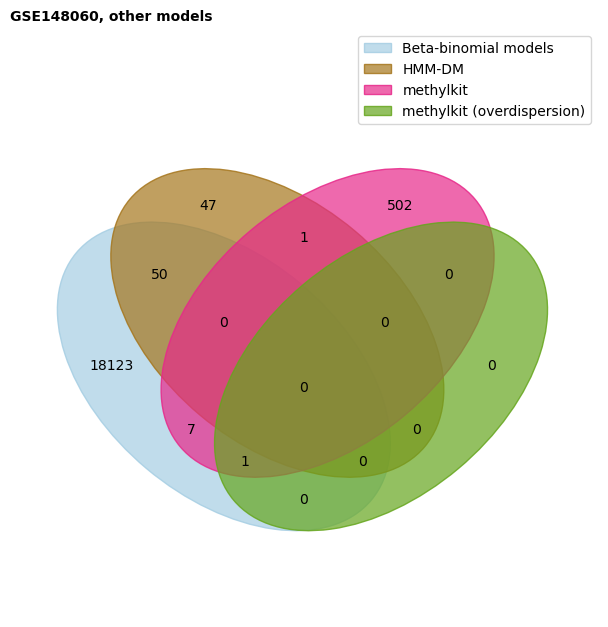

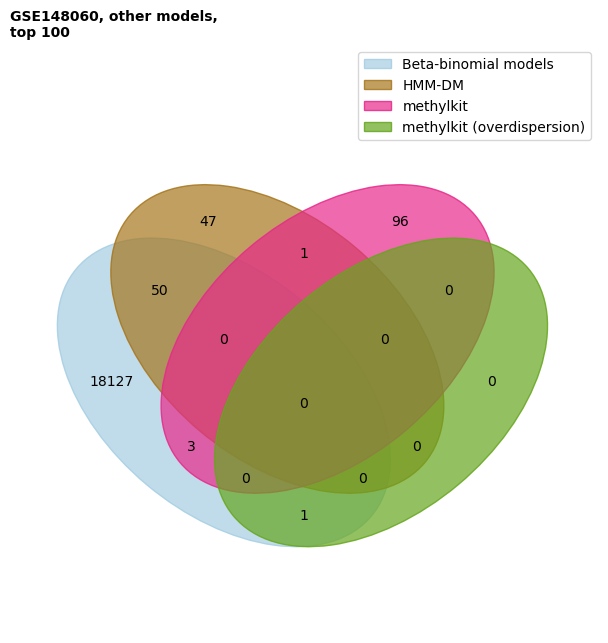

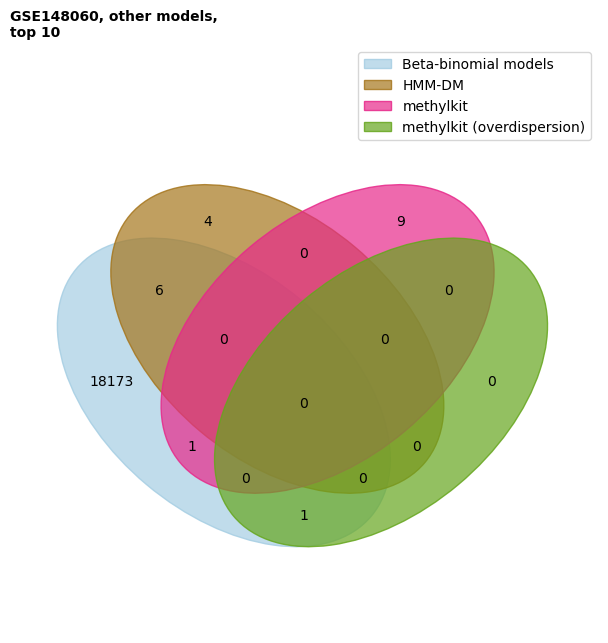

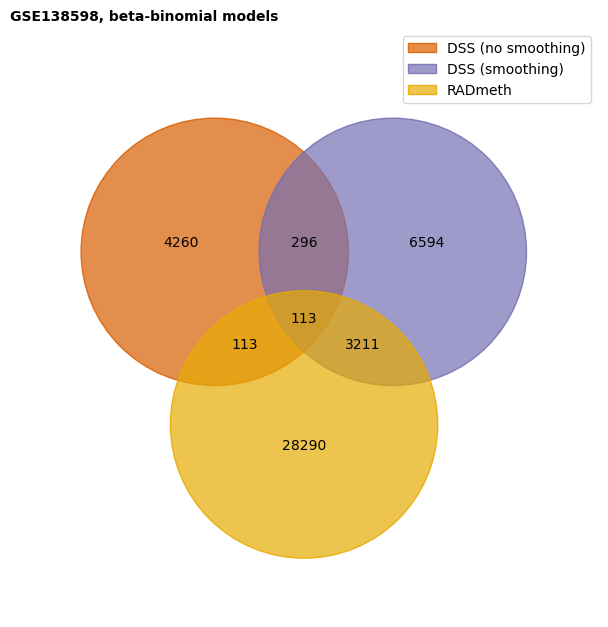

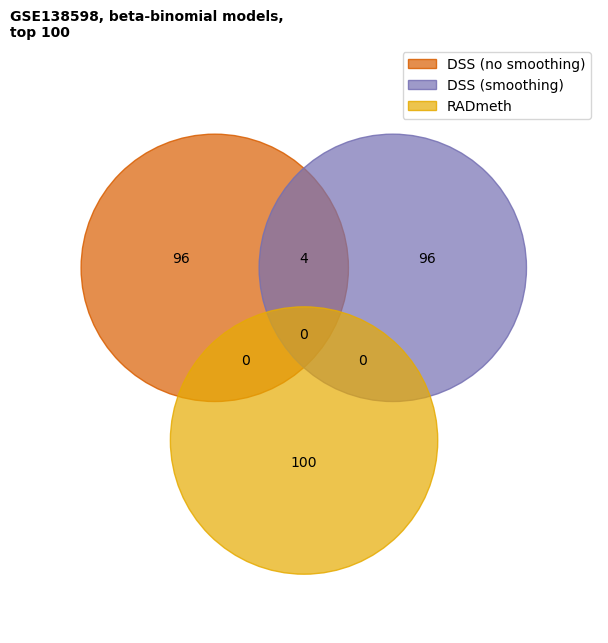

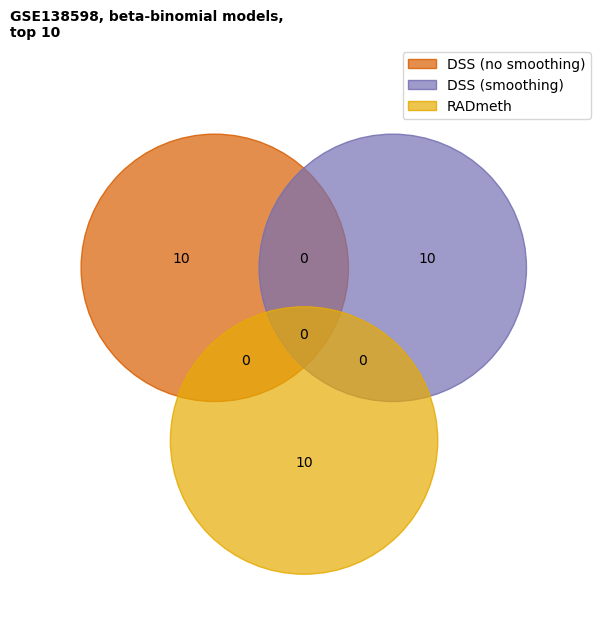

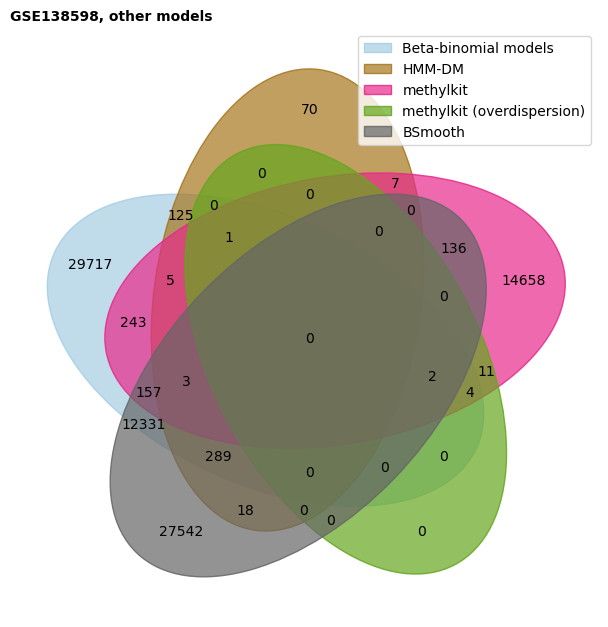

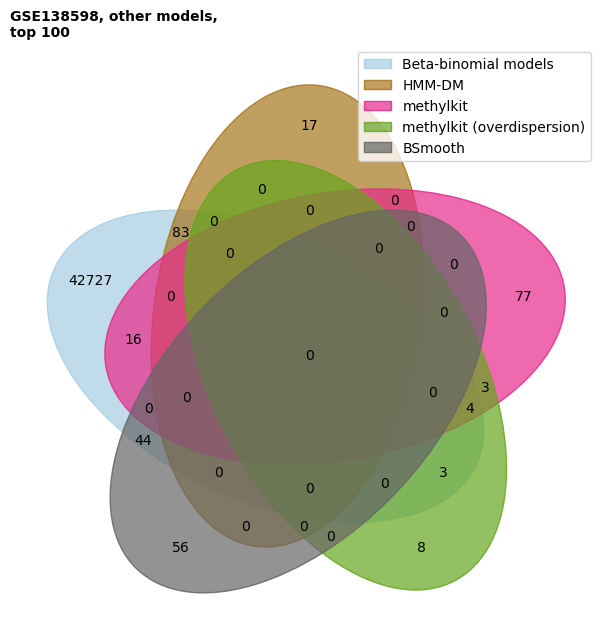

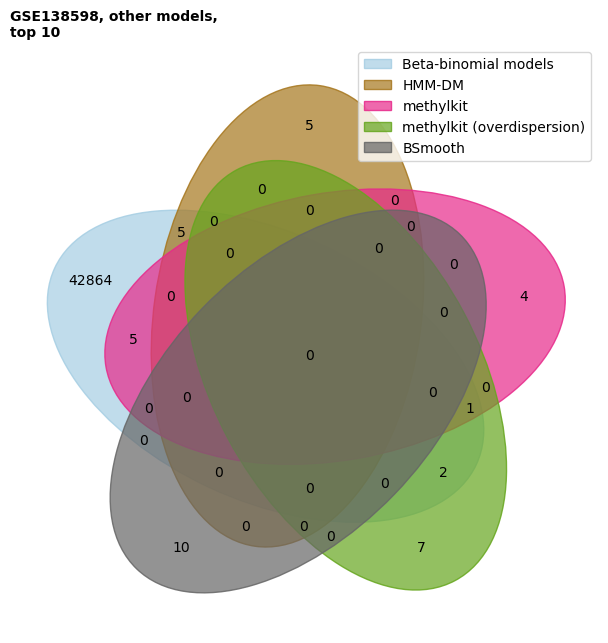

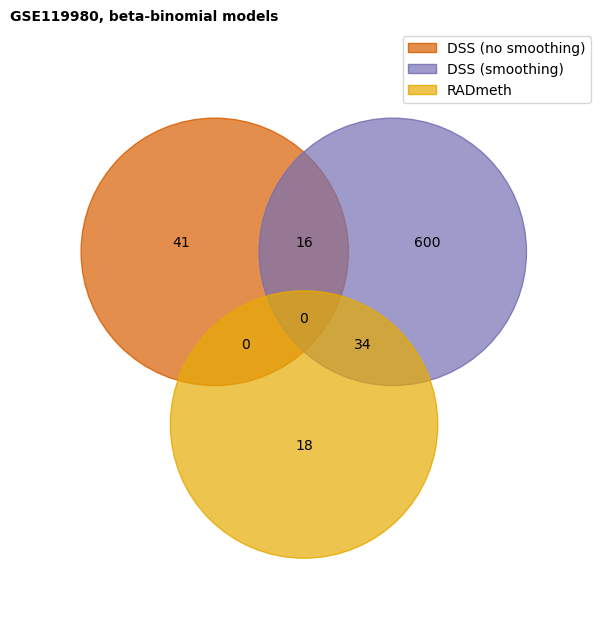

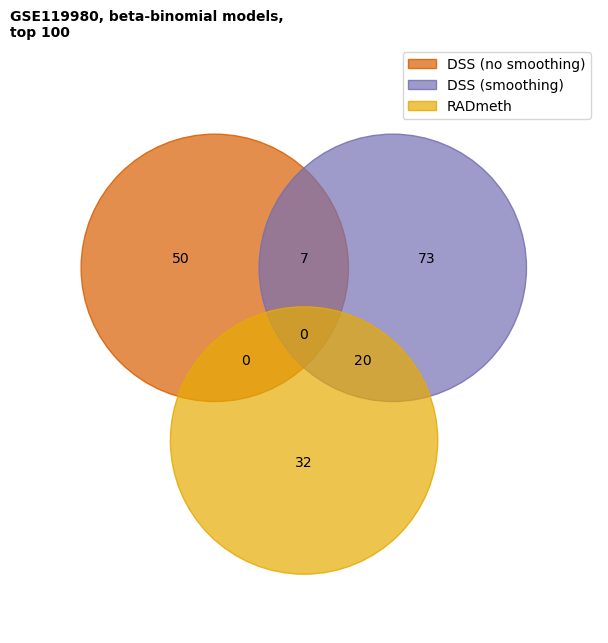

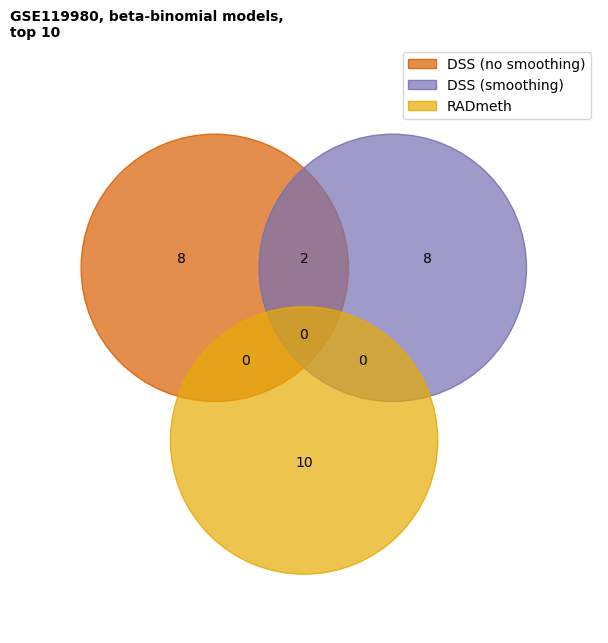

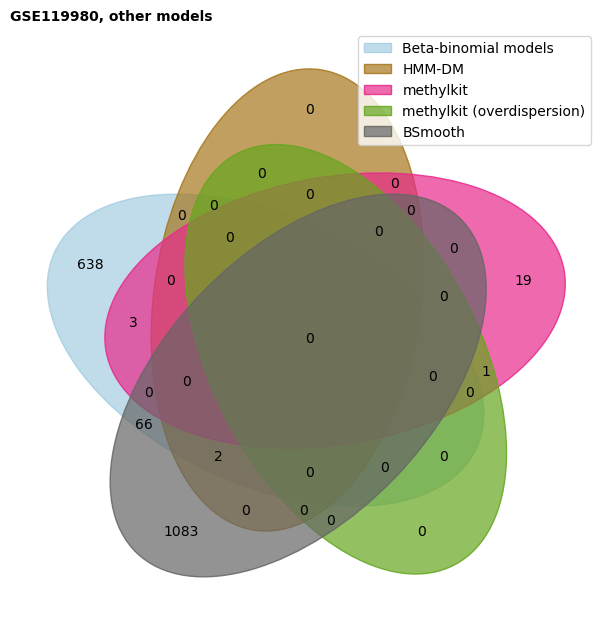

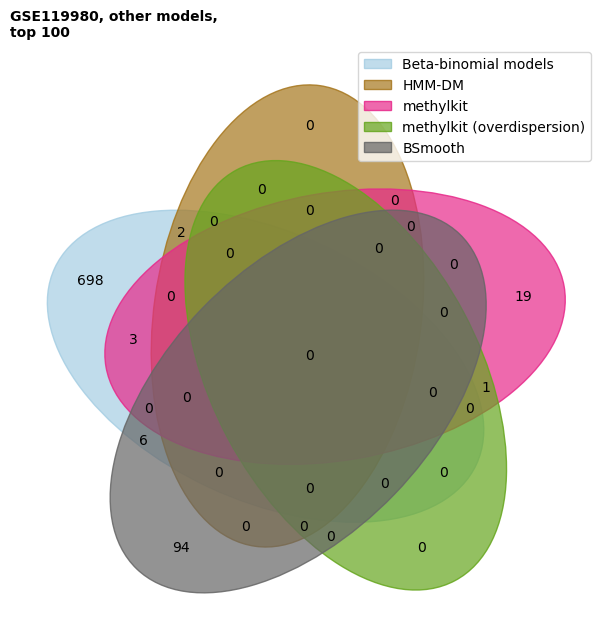

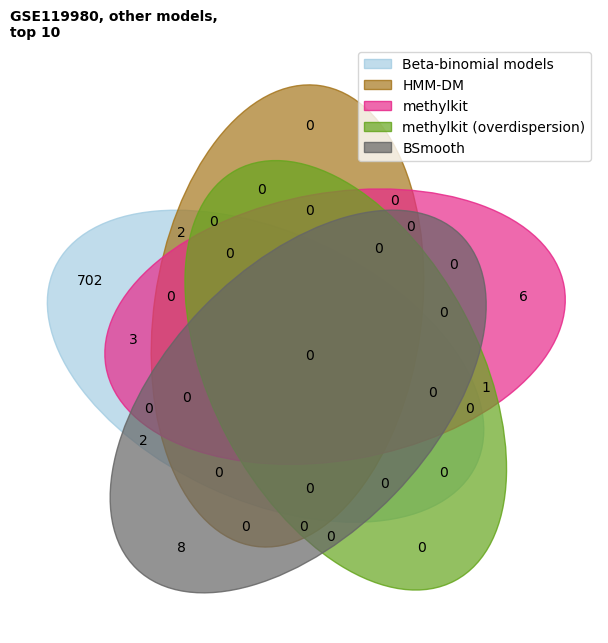

In [33]:
for dataset in datasets:
    bin_venn_dict = {}
    bin_venn_dict_100 = {}
    bin_venn_dict_10 = {}
    all_venn_dict = {}
    all_venn_dict_100 = {}
    all_venn_dict_10 = {}
    os.chdir(f'{base_dir}/{dataset}')
    methylsig = pd.read_csv(dataset + "_methylsig_cut", sep ='\t')
    if methylsig.shape[0] != 0:
        methylsig_signature = methylsig['seqnames'].astype(str) +":"+ methylsig['start'].astype(str)
        bin_venn_dict[f"MethylSig"] = set(methylsig_signature)
        bin_venn_dict_100[f"MethylSig"] = set(methylsig_signature[:100])
        bin_venn_dict_10[f"MethylSig"] = set(methylsig_signature[:10])
    dss_no_smoothing = pd.read_csv(dataset + "_dss_no_smoothing_cut", sep ='\t')
    if dss_no_smoothing.shape[0] != 0:
        dss_no_smoothing_signature = dss_no_smoothing['chr'].astype(str)+ ":" + dss_no_smoothing['pos'].astype(str)
        bin_venn_dict[f"DSS (no smoothing)"] = set(dss_no_smoothing_signature)
        bin_venn_dict_100[f"DSS (no smoothing)"] = set(dss_no_smoothing_signature[:100])
        bin_venn_dict_10[f"DSS (no smoothing)"] = set(dss_no_smoothing_signature[:10])
    dss_smoothing = pd.read_csv(dataset + "_dss_smoothing_cut", sep ='\t')
    if dss_smoothing.shape[0] != 0:
        dss_smoothing_signature = dss_smoothing['chr'].astype(str)+ ":" + dss_smoothing['pos'].astype(str)
        bin_venn_dict[f"DSS (smoothing)"] = set(dss_smoothing_signature)
        bin_venn_dict_100[f"DSS (smoothing)"] = set(dss_smoothing_signature[:100])
        bin_venn_dict_10[f"DSS (smoothing)"] = set(dss_smoothing_signature[:10])
    radmeth = pd.read_csv(dataset + "_radmeth_cut", sep ='\t')
    if radmeth.shape[0] != 0: 
        radmeth_signature = radmeth['V1'].astype(str) + ":" + radmeth['V2'].astype(str)
        bin_venn_dict[f"RADmeth"] = set(radmeth_signature)
        bin_venn_dict_100[f"RADmeth"] = set(radmeth_signature[:100])
        bin_venn_dict_10[f"RADmeth"] = set(radmeth_signature[:10])
    if bin_venn_dict and len(bin_venn_dict) >= 2:
        cmap_list = []
        for a in list(bin_venn_dict.keys()):
            cmap_list.append(cmap.colors[methods.index(a)])
        cmap_current = ListedColormap(cmap_list)
        venn(bin_venn_dict,
             figsize=cm2inch((19.4, 19.4)),
             fontsize=15,
             alpha=0.5,
             cmap = cmap_current)
    plt.savefig(f'without_titles//{dataset}_beta_bin_venn.png', bbox_inches='tight', pad_inches=0)
    plt.title(f'{dataset}, beta-binomial models',fontweight="bold", loc = 'left',fontsize=15)
    plt.savefig(f'with_titles//{dataset}_beta_bin_venn.png', bbox_inches='tight', pad_inches=0)
    if bin_venn_dict_100 and len(bin_venn_dict_100) >= 2:
        cmap_list = []
        for a in list(bin_venn_dict_100.keys()):
            cmap_list.append(cmap.colors[methods.index(a)])
        cmap_current = ListedColormap(cmap_list)
        venn(bin_venn_dict_100,
             figsize=cm2inch((19.4, 19.4)),
             fontsize=15,
             alpha=0.5,
             cmap = cmap_current)
    plt.savefig(f'without_titles//{dataset}_beta_bin_venn_100.png', bbox_inches='tight', pad_inches=0)
    plt.title(f'{dataset}, beta-binomial models,\ntop 100',fontweight="bold", loc = 'left',fontsize=15)
    plt.savefig(f'with_titles//{dataset}_beta_bin_venn_100.png', bbox_inches='tight', pad_inches=0)
    if bin_venn_dict_10 and len(bin_venn_dict_10) >= 2:
        cmap_list = []
        for a in list(bin_venn_dict_10.keys()):
            cmap_list.append(cmap.colors[methods.index(a)])
        cmap_current = ListedColormap(cmap_list)
        venn(bin_venn_dict_10,
             figsize=cm2inch((19.4, 19.4)),
             fontsize=15,
             alpha=0.5,
             cmap = cmap_current)
    plt.savefig(f'without_titles//{dataset}_beta_bin_venn_10.png', bbox_inches='tight', pad_inches=0)
    plt.title(f'{dataset}, beta-binomial models,\ntop 10',fontweight="bold", loc = 'left',fontsize=15)
    plt.savefig(f'with_titles//{dataset}_beta_bin_venn_10.png', bbox_inches='tight', pad_inches=0)
    bet_bin_intesect = set()
    bet_bin_intesect_100 = set()
    bet_bin_intesect_10 = set()
    for m in bin_venn_dict:
        bet_bin_intesect = bet_bin_intesect | bin_venn_dict[m]
    for m in bin_venn_dict_100:
        bet_bin_intesect_100 = bet_bin_intesect_100 | bin_venn_dict_100[m]
    for m in bin_venn_dict_10:
        bet_bin_intesect_10 = bet_bin_intesect_10 | bin_venn_dict_10[m]
    all_venn_dict[f"Beta-binomial models"] = bet_bin_intesect
    all_venn_dict_100[f"Beta-binomial models"] = bet_bin_intesect_100
    all_venn_dict_10[f"Beta-binomial models"] = bet_bin_intesect_10
    hmm = pd.read_csv(dataset + "_hmm_cut", sep ='\t')
    if hmm.shape[0] != 0:
        hmm_signature = hmm['chr'].astype(str)+ ":" + hmm['pos'].astype(str)
        all_venn_dict['HMM-DM'] = set(hmm_signature)
        all_venn_dict_100['HMM-DM'] = set(hmm_signature[:100])
        all_venn_dict_10['HMM-DM'] = set(hmm_signature[:10])
    methylkit = pd.read_csv(dataset + "_methylkit_cut", sep ='\t')
    if methylkit.shape[0] != 0:
        methylkit_signature = methylkit['chr'].astype(str)+ ":" + methylkit['start'].astype(str)
        all_venn_dict['methylkit'] = set(methylkit_signature)
        all_venn_dict_100['methylkit'] = set(methylkit_signature[:100])
        all_venn_dict_10['methylkit'] = set(methylkit_signature[:10])
    methylkit_overdispersion = pd.read_csv(dataset + "_methylkit_overdispersion_cut", sep ='\t')
    if methylkit_overdispersion.shape[0] != 0:
        methylkit_overdispersion_signature = methylkit_overdispersion['chr'].astype(str) +":"+ methylkit_overdispersion['start'].astype(str)
        all_venn_dict['methylkit (overdispersion)'] = set(methylkit_overdispersion_signature)
        all_venn_dict_100['methylkit (overdispersion)'] = set(methylkit_overdispersion_signature[:100])
        all_venn_dict_10['methylkit (overdispersion)'] = set(methylkit_overdispersion_signature[:10])
    if os.path.exists(dataset + "_bsmooth_cut"):
        bsmooth = pd.read_csv(dataset + "_bsmooth_cut", sep ='\t')
        if bsmooth.shape[0] != 0: 
            bsmooth_signature = bsmooth.index
            all_venn_dict['BSmooth'] = set(bsmooth_signature)
            all_venn_dict_100['BSmooth'] = set(bsmooth_signature[:100])
            all_venn_dict_10['BSmooth'] = set(bsmooth_signature[:10])
    if all_venn_dict and len(all_venn_dict) >= 2:
        cmap_list = [cmap1.colors[0]]
        for a in list(all_venn_dict.keys()):
            if a in methods:
                cmap_list.append(cmap.colors[methods.index(a)])
        cmap_current = ListedColormap(cmap_list)
        venn(all_venn_dict,
             figsize=cm2inch((19.4, 19.4)),
             fontsize=15,
             alpha=0.5,
             cmap = cmap_current)
    plt.savefig(f'without_titles//{dataset}_all_venn.png', bbox_inches='tight', pad_inches=0)
    plt.title(f'{dataset}, other models', fontweight="bold", loc = 'left',fontsize=15)
    plt.savefig(f'with_titles//{dataset}_all_venn.png', bbox_inches='tight', pad_inches=0)
    if all_venn_dict_100 and len(all_venn_dict_100) >= 2:
        cmap_list = [cmap1.colors[0]]
        for a in list(all_venn_dict_100.keys()):
            if a in methods:
                cmap_list.append(cmap.colors[methods.index(a)])
        cmap_current = ListedColormap(cmap_list)
        venn(all_venn_dict_100,
             figsize=cm2inch((19.4, 19.4)),
             fontsize=15,
             alpha=0.5,
             cmap = cmap_current)
    plt.savefig(f'without_titles//{dataset}_all_venn_100.png', bbox_inches='tight', pad_inches=0)
    plt.title(f'{dataset}, other models,\ntop 100', fontweight="bold", loc = 'left',fontsize=15)
    plt.savefig(f'with_titles//{dataset}_all_venn_100.png', bbox_inches='tight', pad_inches=0)
    if all_venn_dict_10 and len(all_venn_dict_10) >= 2:
        cmap_list = [cmap1.colors[0]]
        for a in list(all_venn_dict_10.keys()):
            if a in methods:
                cmap_list.append(cmap.colors[methods.index(a)])
        cmap_current = ListedColormap(cmap_list)
        venn(all_venn_dict_10,
             figsize=cm2inch((19.4, 19.4)),
             fontsize=15,
             alpha=0.5,
             cmap = cmap_current)
    plt.savefig(f'without_titles//{dataset}_all_venn_10.png', bbox_inches='tight', pad_inches=0)
    plt.title(f'{dataset}, other models,\ntop 10', fontweight="bold", loc = 'left',fontsize=15)
    plt.savefig(f'with_titles//{dataset}_all_venn_10.png', bbox_inches='tight', pad_inches=0)
    os.chdir('../')